In [1]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [2]:
data=pd.read_csv(r"C:\Users\Sony\Desktop\KBA.csv",encoding = "ISO-8859-1")

In [3]:
data.head()

,question,answer
0,Hi111,Hi there! How can I help you?
1,Hello,Hello human. <rb>How can I be of assistance?
2,Good,That's good to hear &#128516;. Thank you for t...
3,Bad,Sorry to hear that &#128551; . Thank you for t...
4,What is AI?,\r\nArtificial intelligence is the branch of e...


In [4]:
data.describe()

,question,answer
count,103,103
unique,103,78
top,Do not worry,Please contact +919686030058 or +919008411977 ...
freq,1,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
question    103 non-null object
answer      103 non-null object
dtypes: object(2)
memory usage: 1.7+ KB


In [7]:
print ("Let's explore our question set",data["question"])
print ("Length of training set",len(data["question"]))
print ("Unique answers are",set(data["answer"])," and number of unique answers are ", len(set(data["answer"])))

Let's explore our question set 0                                                  Hi111
1                                                  Hello
2                                                   Good
3                                                    Bad
4                                            What is AI?
5                                     How are you doing?
6                                         Iam doing good
7                               You are not making sense
8                                     What is a chat bot
9                          What is it like to be a robot
10                      What is it like being a computer
11                                           I am afraid
12                                         Something fun
13                                  How can i offend you
14                                          Do not worry
15                                        Do you get mad
16                                          No it is not


In [8]:
##### Now let's create a wordcloud to get a better understanding of our corpus
import matplotlib.pyplot as plt
from wordcloud import WordCloud
##### Download using conda install -c conda-forge wordcloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

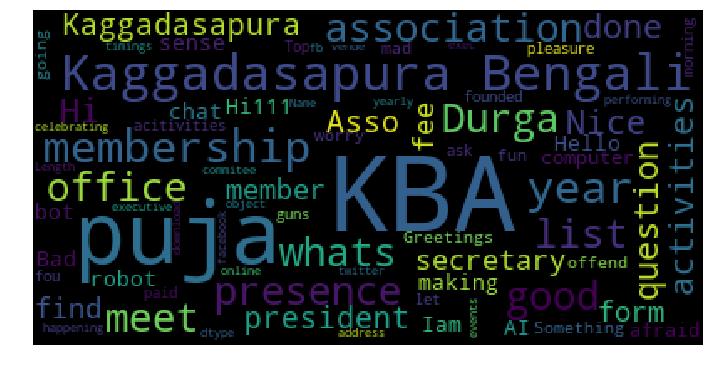

In [10]:
show_wordcloud(data['question'])

In [11]:
##### Let's change the list of questions into list of words for better visualization
word_list=[]
list_question=list(data["question"])
for sentence in list_question:
	words_sentence=sentence.split()
	for words in words_sentence:
		word_list.append(words)


word_list=[word for sentence in list(data["question"]) for word in sentence.split()]
print(word_list)

['Hi111', 'Hello', 'Good', 'Bad', 'What', 'is', 'AI?', 'How', 'are', 'you', 'doing?', 'Iam', 'doing', 'good', 'You', 'are', 'not', 'making', 'sense', 'What', 'is', 'a', 'chat', 'bot', 'What', 'is', 'it', 'like', 'to', 'be', 'a', 'robot', 'What', 'is', 'it', 'like', 'being', 'a', 'computer', 'I', 'am', 'afraid', 'Something', 'fun', 'How', 'can', 'i', 'offend', 'you', 'Do', 'not', 'worry', 'Do', 'you', 'get', 'mad', 'No', 'it', 'is', 'not', 'No', 'Greetings!', 'Hi,', 'How', 'is', 'it', 'going?', 'Nice', 'to', 'meet', 'you.', 'How', 'do', 'you', 'do?', 'Hi,', 'nice', 'to', 'meet', 'you.', 'It', 'is', 'a', 'pleasure', 'to', 'meet', 'you.', 'Top', 'of', 'the', 'morning', 'to', 'you!', "What's", 'up?', 'I', 'am', 'good', 'you', 'get', 'paid', 'guns', 'let', 'me', 'ask', 'you', 'a', 'question', 'How', 'are', 'you?', 'How', 'are', 'you', 'doing', 'today?', 'How', 'do', 'you', 'do', '?', 'Whats', 'up?', 'Can', 'you', 'help', 'me', 'Need', 'your', 'help?', 'Hey', 'Hey', 'Hello', 'Hi', 'Hello', '

In [12]:
##### Now let's find the frequency of each word and the most common words in the corpus
frequency=Counter(word_list)
print (frequency)
print (frequency.most_common(5))

Counter({'you': 28, 'is': 23, 'are': 14, 'What': 13, 'How': 11, 'a': 11, 'your': 11, 'KBA': 10, 'I': 9, 'do': 8, 'of': 8, 'can': 7, 'the': 7, '?': 7, 'Kaggadasapura': 7, 'Bengali': 7, 'to': 6, 'Who': 6, 'it': 5, 'Are': 5, 'When': 5, 'Association': 5, 'get': 4, 'what': 4, 'have': 4, 'for': 4, 'this': 4, 'year': 4, 'puja': 4, 'Hello': 3, 'Good': 3, 'not': 3, 'bot': 3, 'am': 3, 'meet': 3, 'you.': 3, 'whats': 3, 'association': 3, 'list': 3, 'Where': 3, 'membership': 3, 'presence': 3, 'in': 3, 'where': 3, 'office': 3, 'Iam': 2, 'doing': 2, 'good': 2, 'chat': 2, 'like': 2, 'be': 2, 'robot': 2, 'fun': 2, 'i': 2, 'Do': 2, 'No': 2, 'Hi,': 2, 'up?': 2, 'me': 2, 'ask': 2, 'you?': 2, 'Whats': 2, 'Can': 2, 'Hey': 2, 'human': 2, 'happy': 2, 'trust': 2, 'name': 2, 'done': 2, 'by': 2, 'activities': 2, 'was': 2, 'founded': 2, 'president': 2, '2018': 2, 'Durga': 2, 'Puja': 2, 'secretary': 2, 'find': 2, 'member': 2, 'executive': 2, 'commitee?': 2, 'form': 2, 'fee': 2, 'Hi111': 1, 'Bad': 1, 'AI?': 1, 'doi

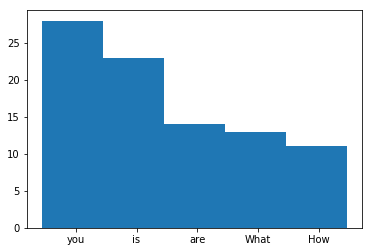

In [13]:
import numpy as np

labels,values = zip(*frequency.items())
labels=[]
values=[]
for T in frequency.most_common(5):
    labels.append(T[0])
    values.append(T[1])

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.05, labels)
plt.show()

In [14]:
##### Now let's pre process/ clean our data

In [16]:
### Remove Punctuations and change words to lower case
def remove_punctuations(text):    
    words=[word.lower() for word in text.split()] 
    words=[w for word in words for w in re.sub(r'[^\w\s]','',word).split()]    
    return words

data["question_punctuation_removed"]=data["question"].apply(remove_punctuations)
print (data["question_punctuation_removed"])

0                                                [hi111]
1                                                [hello]
2                                                 [good]
3                                                  [bad]
4                                         [what, is, ai]
5                                 [how, are, you, doing]
6                                     [iam, doing, good]
7                         [you, are, not, making, sense]
8                               [what, is, a, chat, bot]
9                 [what, is, it, like, to, be, a, robot]
10              [what, is, it, like, being, a, computer]
11                                       [i, am, afraid]
12                                      [something, fun]
13                            [how, can, i, offend, you]
14                                      [do, not, worry]
15                                   [do, you, get, mad]
16                                     [no, it, is, not]
17                             

In [17]:
### Remove StopWords
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
print (stop)
def remove_stopwords(text):
	modified_word_list=[word for word in text if word not in stop]
	return modified_word_list

data["question_stopword_removed"]=data["question_punctuation_removed"].apply(remove_stopwords)
print (data["question_stopword_removed"])

{'wouldn', 'o', 'of', 'just', 'shouldn', 'while', 'didn', 'doesn', 'that', 'each', 'don', 'an', 'will', 'which', 'isn', 'we', 'do', "couldn't", 'him', 'theirs', "you'd", 'himself', 'her', 'about', 'are', 't', 'had', 'being', 'aren', 'myself', 'hers', 'against', "should've", 'as', 'nor', 'yours', 'm', 'he', 'a', 'these', 'shan', 'whom', 'why', 'again', 'ain', 'was', 'down', 'who', 'herself', 'haven', "won't", 'other', 'their', 'between', 'those', 'having', 'itself', 'weren', "haven't", "hadn't", 'no', 'mustn', 'few', 'into', "wasn't", 'doing', 'you', 'did', 'because', "you're", 'there', "shan't", 'mightn', 'me', 'most', 'our', "needn't", 'be', 'out', 'more', 'how', "hasn't", 'own', 'when', 'they', 'been', "shouldn't", "that'll", 'in', 'his', 'the', 'so', "wouldn't", 'off', 'can', "didn't", "mustn't", 'my', 'not', 'y', "aren't", 'your', "it's", 'further', 'wasn', 'until', 'on', 'than', 'to', 'some', "you've", 'them', 'yourselves', 'by', 'were', 'above', 'hasn', 'here', 'up', 'then', 'too

In [18]:
def negation_handling(words):
    counter=False    
    wlist=[]    
    negations=["no","not","cant","cannot","never","less","without","barely","hardly","rarely","no","not","noway","didnt"]
    #for words in wordlist:       
    for i,j in enumerate(words):                           
            if j in negations and i<len(words)-1:             
                wlist.append(str(words[i]+'-'+words[i+1]))
                counter=True
            else:
                if counter is False:                
                    wlist.append(words[i])
                else:
                    counter=False
    return wlist

data["question_negated"]=data["question_punctuation_removed"].apply(negation_handling)
print (data["question_negated"])

0                                                [hi111]
1                                                [hello]
2                                                 [good]
3                                                  [bad]
4                                         [what, is, ai]
5                                 [how, are, you, doing]
6                                     [iam, doing, good]
7                          [you, are, not-making, sense]
8                               [what, is, a, chat, bot]
9                 [what, is, it, like, to, be, a, robot]
10              [what, is, it, like, being, a, computer]
11                                       [i, am, afraid]
12                                      [something, fun]
13                            [how, can, i, offend, you]
14                                       [do, not-worry]
15                                   [do, you, get, mad]
16                                      [no-it, is, not]
17                             

In [19]:
from nltk.tag import pos_tag
def descriptive_words(words):
    meaningful_words=[]    
    tags=['VB','VBP','VBD','VBG','VBN','JJ','JJR','JJS','RB','RBR','RBS','UH',"NN",'NNP']    
    tagged_word=pos_tag(words)
    for word in tagged_word:            
        if word[1] in tags:
            meaningful_words.append(word[0])
    return meaningful_words 
data["question_descriptive"]=data["question_negated"].apply(descriptive_words)
print (data["question_descriptive"])

0                                                [hi111]
1                                                [hello]
2                                                 [good]
3                                                  [bad]
4                                                   [ai]
5                                           [are, doing]
6                                     [iam, doing, good]
7                               [are, not-making, sense]
8                                            [chat, bot]
9                                            [be, robot]
10                                     [being, computer]
11                                       [i, am, afraid]
12                                      [something, fun]
13                                           [i, offend]
14                                       [do, not-worry]
15                                        [do, get, mad]
16                                          [no-it, not]
17                             

In [20]:
### Stemming of Words
from nltk.stem.porter import PorterStemmer
st=PorterStemmer()
def Stemming(text):
	stemmed_words=[st.stem(word) for word in text] 
	return stemmed_words

data["question_stemmed"]=data["question_descriptive"].apply(Stemming)
print (data["question_stemmed"])

0                                                [hi111]
1                                                [hello]
2                                                 [good]
3                                                  [bad]
4                                                   [ai]
5                                              [are, do]
6                                        [iam, do, good]
7                                   [are, not-mak, sens]
8                                            [chat, bot]
9                                            [be, robot]
10                                          [be, comput]
11                                       [i, am, afraid]
12                                         [someth, fun]
13                                           [i, offend]
14                                       [do, not-worri]
15                                        [do, get, mad]
16                                          [no-it, not]
17                             

In [21]:
### Recreating the sentence
def Recreate(text):
	word=" ".join(text)
	return word

data["modified_sentence"]=data["question_stemmed"].apply(Recreate)
print (data["modified_sentence"])

0                                            hi111
1                                            hello
2                                             good
3                                              bad
4                                               ai
5                                           are do
6                                      iam do good
7                                 are not-mak sens
8                                         chat bot
9                                         be robot
10                                       be comput
11                                     i am afraid
12                                      someth fun
13                                        i offend
14                                    do not-worri
15                                      do get mad
16                                       no-it not
17                                                
18                                                
19                             

In [23]:
def Cleaning(text):
    text_punctuation_removed=remove_punctuations(text)
    #text_stopword_removed=remove_stopwords(text_punctuation_removed)
    text_unnegated=negation_handling(text_punctuation_removed)
    text_descriptive=descriptive_words(text_unnegated)
    text_stemmed=Stemming(text_descriptive)
    final_text=Recreate(text_stemmed)
    return final_text
data["modified_sentence"]=data["question"].apply(Cleaning)
print (data["modified_sentence"])

0                                            hi111
1                                            hello
2                                             good
3                                              bad
4                                               ai
5                                           are do
6                                      iam do good
7                                 are not-mak sens
8                                         chat bot
9                                         be robot
10                                       be comput
11                                     i am afraid
12                                      someth fun
13                                        i offend
14                                    do not-worri
15                                      do get mad
16                                       no-it not
17                                                
18                                                
19                             

In [25]:
### Let's change the sentence into a bag of word model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["question"]).toarray()
print(X)
print(vectorizer.get_feature_names())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
['2018', 'acitivities', 'actions', 'activities', 'address', 'afraid', 'afternoon', 'ai', 'am', 'are', 'ask', 'association', 'at', 'bad', 'basic', 'be', 'being', 'bengali', 'best', 'bot', 'by', 'can', 'capability', 'celebrating', 'chat', 'chatbot', 'commitee', 'computer', 'created', 'determine', 'do', 'does', 'doing', 'done', 'download', 'durga', 'events', 'executive', 'facebook', 'fb', 'feature', 'fee', 'feeling', 'female', 'find', 'for', 'form', 'founded', 'fun', 'get', 'going', 'good', 'great', 'greetings', 'guns', 'happening', 'happy', 'have', 'hello', 'help', 'hey', 'hi', 'hi111', 'how', 'human', 'iam', 'in', 'is', 'it', 'kaggadasapura', 'kba', 'languages', 'let', 'like', 'list', 'mad', 'making', 'male', 'me', 'meet', 'member', 'membership', 'morning', 'name', 'need', 'nice', 'no', 'not', 'of', 'offend', 'office', 'online', 'or', 'paid', 'performing', 'pleasure', 

In [26]:
###### Extra Tf-idf transformation and DataPipelines
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
model = Pipeline([('vectoizer', CountVectorizer()),
 ('tfidf', TfidfTransformer())])

X_train = model.fit_transform(data["modified_sentence"]).toarray()

In [27]:
print(X_train)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.47353578 0.        ]
 [0.         0.         0.         ... 0.         0.4521933  0.        ]]


In [29]:
Y=data["answer"]
question="What is AI"

In [30]:
### Let's create our first Classification model

from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression().fit(X_train, Y)


P=model.transform([Cleaning(question)])
predict1=clf1.predict(P)
print (predict1)

C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


['\r\nArtificial intelligence is the branch of engineering and science devoted to constructing machines that think. ']


In [31]:
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB().fit(X_train, Y)

P=model.transform([Cleaning(question)])
predict2=clf2.predict(P)
print (predict2)

['Please refer https://kbaonline.org.in/ for 2018 Puja events']


In [32]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier().fit(X_train, Y)

P=model.transform([Cleaning(question)])
predict3=clf3.predict(P)
print (predict3)

['\r\nArtificial intelligence is the branch of engineering and science devoted to constructing machines that think. ']


In [33]:
from sklearn import tree
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

print (graph)
graph.write_pdf("iris.pdf")
from IPython.display import Image

Image(graph.create_png())

In [34]:
final_predict=[]
final_predict=list(predict1)+list(predict2)+list(predict3)
final_predict = Counter(final_predict)
print ("Thus answer to your question is",final_predict.most_common(1)[0][0])

Thus answer to your question is 
Artificial intelligence is the branch of engineering and science devoted to constructing machines that think. 


In [35]:
def Predict(text):
    P=model.transform([Cleaning(text)])
    predict1=clf1.predict(P)
    #print (predict1)

    predict2=clf2.predict(P)
    #print (predict2)
    
    predict3=clf3.predict(P)
    #print (predict3)
    
    final_predict=[]
    final_predict=list(predict1)+list(predict2)+list(predict3)
    final_predict = Counter(final_predict)
    print ("Class of Question belongs to = ",final_predict.most_common(1)[0][0])
    
    return final_predict.most_common(1)[0][0]

In [ ]:
##### Finding the most similar sentence
from sklearn.metrics.pairwise import linear_kernel

cosine_similarities = linear_kernel(X_train[1], X_train).flatten()
print ("Cosine Similarity of",data["question"][0],"with all questions in Corpus",cosine_similarities)
index=[i+1 for i in range(len(X))]
print (index)
print ("top 3 most similar question's to",data["question"][0],"are :")
print (sorted(zip(cosine_similarities, index, data["question"][index]), reverse=True)[:3])
print ("Thus answer to your question is ", max(data["answer"][index[0]],data["answer"][index[1]],data["answer"][index[3]]))

In [ ]:
###### Generate Answers ######
answer_dictionary={"greeting":["Hello human. <rb>How can I be of assistance?"],
                  "greeting":["What is AI","Artificial intelligence is the branch of engineering and science devoted to constructing machines that think"],
                  "goodbye":["Goodbye","Have a good day","Was nice meeting you","See you later"]}

In [41]:
import random

def generate_answer(predict_class):
    ans=random.choice(answer_dictionary[predict_class])
    return ans

In [ ]:
###### The ChatBot #######
question = input("Enter Question =")
prediction=Predict(question)
ans=generate_answer(prediction)
print("Answer = ",ans)

In [78]:
### Checking Accuracy of the Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#X_train, X_test, Y_train, Y_test = train_test_split(data["question"], data["answer"], random_state=0)

X_test=["Hello human. <rb>How can I be of assistance?"]
Y_test=["greeting","AI","greeting"]

Y_pred=[]
for i in X_test:
    prediction=Predict(i)
    print(prediction)
    Y_pred.append(prediction)
print (Y_pred)
print (Y_test)
cnf_matrix = confusion_matrix(Y_test,Y_pred)
print (cnf_matrix)

Class of Question belongs to =  Hello human. <rb>How can I be of assistance?
Hello human. <rb>How can I be of assistance?
['Hello human. <rb>How can I be of assistance?']
['greeting', 'AI', 'greeting']


ValueError: Found input variables with inconsistent numbers of samples: [3, 1]

In [79]:
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
plot_confusion_matrix(cnf_matrix, classes=["+","-"],title='Confusion matrix')

NameError: name 'cnf_matrix' is not defined